## Python implementation of mixture of gamma distributions

Based on the mixtools R package implementation: https://github.com/cran/mixtools/blob/master/R/gammamixEM.R

The code for this implementation resides in: https://github.com/kundajelab/tfmodisco/blob/master/modisco/gammamix.py

In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np
import scipy
from scipy.stats import gamma

def sample_from_gamma(n, a, scale):   
    return scipy.stats.gamma.ppf(np.random.random(n), a=a, scale=scale)

def generate_sim(mixing_proportion, n, a1, scale1, a2, scale2):

    all_vals1 = sample_from_gamma(int(n*mixing_proportion),
                                  a=a1, scale=scale1)
    all_vals2 = sample_from_gamma(int(n*(1-mixing_proportion)),
                                  a=a2, scale=scale2)

    all_vals = []
    all_vals.extend(all_vals1)
    all_vals.extend(all_vals2)
    return np.array(all_vals)

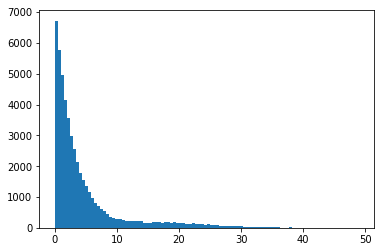

In [3]:
mixing_proportion = 0.9
n = 50000

a1 = 1
scale1 = 3
a2 = 10
scale2 = 2

all_vals = generate_sim(mixing_proportion=mixing_proportion,
                      n=n,
                      a1=a1,
                      scale1=scale1,
                      a2=a2,
                      scale2=scale2)

%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(all_vals, bins=100)
plt.show()

In [4]:
import sys
sys.path.insert(-1,"../../modisco")
import gammamix
reload(gammamix)
results = gammamix.gammamix_em(
                all_vals,
                #initial guess at the mixing proportion
                mix_prop=np.array([0.7, 0.3]),
                verb=False)
print(results.params)

initial vals: [0.7 0.3] [1.93513122 2.46537046] [1.13293332 0.21068611] 2
Number of iterations= 593
MixParams(mix_prop=array([0.1001018, 0.8998982]), alpha=array([9.50460342, 1.00900462]), invbeta=array([2.11896121, 2.96232565]), k=2)


MixParams(mix_prop=array([0.1001018, 0.8998982]), alpha=array([9.50460342, 1.00900462]), invbeta=array([2.11896121, 2.96232565]), k=2)


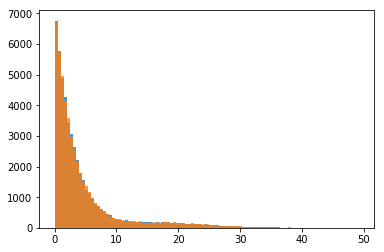

In [5]:
print(results.params)
plt.hist(generate_sim(mixing_proportion=results[0].mix_prop[0],
                      n=n,
                      a1=results[0].alpha[0],
                      scale1=(results[0].invbeta[0]),
                      a2=results[0].alpha[1],
                      scale2=(results[0].invbeta[1])), alpha=0.8, bins=100)
plt.hist(all_vals,alpha=0.8, bins=100)
plt.show()